<a href="https://colab.research.google.com/github/distinctkemi/CE888/blob/main/Labs/Lab2/Lab_2_(bootstrap).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [4]:
df.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [5]:
display(df)

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [6]:
print(df.columns)

Index(['Day', ' Millons of pounds in sales'], dtype='object')


In [7]:
#All rows, second column
dataa = df.iloc[:, 1].values
dataa

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


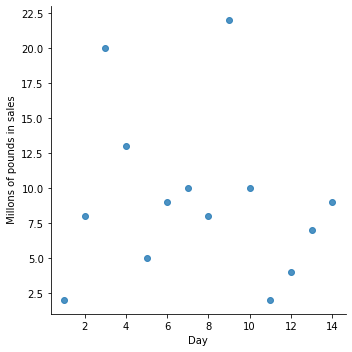

In [8]:
sns.lmplot(df.columns[0], df.columns[1], data = df, fit_reg= False)

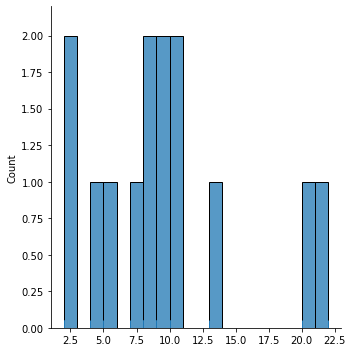

In [9]:
sns.displot(data, bins=20, kde=False, rug=True)

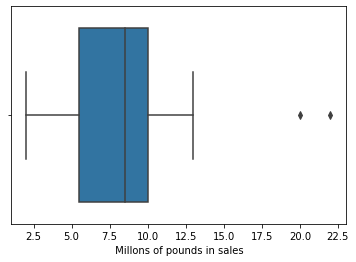

In [10]:
sns.boxplot(x=' Millons of pounds in sales', data=df)

In [11]:
df[' Millons of pounds in sales'].mean()

9.214285714285714

In [12]:
df.describe(include = 'all')

,Day,Millons of pounds in sales
count,14.0000,14.000000
mean,7.5000,9.214286
std,4.1833,5.898873
min,1.0000,2.000000
25%,4.2500,5.500000
50%,7.5000,8.500000
75%,10.7500,10.000000
max,14.0000,22.000000


In [13]:
print('Mean: %f ' %np.mean(data))
print('Median: %f ' %np.median(data))
print('Var: %f ' %np.var(data))
print('std: %f ' %np.std(data))


Mean: 9.214286 
Median: 8.500000 
Var: 32.311224 
std: 5.684296 


In [14]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
    y = np.random.choice(x, (n_bootstraps, sample_size))
    data_mean = np.mean(y)
    boot_mean = np.mean(y, axis =1)
    
    lower = np.percentile(boot_mean,2.5)
    upper = np.percentile(boot_mean,97.5)
    
    return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Bootstrap Iterations,Mean,Value
0,100,9.254286,mean
1,100,6.319643,lower
2,100,12.942857,upper
3,1100,9.249416,mean
4,1100,6.500000,lower
...,...,...,...
145,48100,6.428571,lower
146,48100,12.357143,upper
147,49100,9.215426,mean
148,49100,6.428571,lower


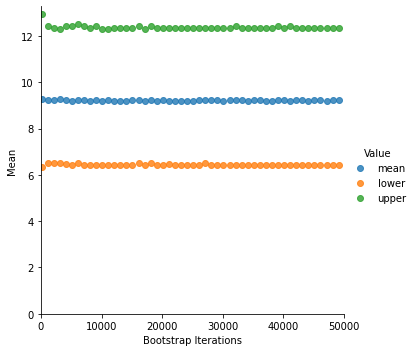

In [15]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
df_boot


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [16]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
    y = np.random.choice(sample, (n_bootstraps, sample_size))
    data_mean = np.mean(y)
    boot_mean = np.mean(y, axis =1)
    
    lower = np.percentile(boot_mean, (100-ci)/2)
    upper = np.percentile(boot_mean, (100+ci)/2)
    return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

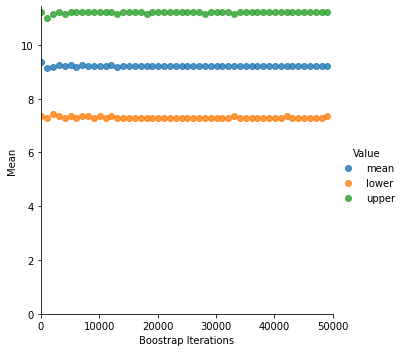

In [17]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [18]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
print(df.head())



# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).

# Note: you can add more cells as needed to organise your code and your plots


   Current fleet  New Fleet
0             18       24.0
1             15       27.0
2             18       27.0
3             16       25.0
4             17       31.0


In [19]:
#Creating a new column called Vehicle ID
df['Vehicle_ID'] = np.arange(0,len(df))
df.head()

,Current fleet,New Fleet,Vehicle_ID
0,18,24.0,0
1,15,27.0,1
2,18,27.0,2
3,16,25.0,3
4,17,31.0,4


In [20]:
df.isnull().sum()

Current fleet      0
New Fleet        170
Vehicle_ID         0
dtype: int64

In [28]:
#Creating an array for Current fleet column only
current_data = df['Current fleet'].values
print(type(data), data)

<class 'numpy.ndarray'> [ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [21]:
df['Current fleet'].values

array([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 22, 18, 21,
       21, 10, 10, 11,  9, 28, 25, 19, 16, 17, 19, 18, 14, 14, 14, 14, 12,
       13, 13, 18, 22, 19, 18, 23, 26, 25, 20, 21, 13, 14, 15, 14, 17, 11,
       13, 12, 13, 15, 13, 13, 14, 22, 28, 13, 14, 13, 14, 15, 12, 13, 13,
       14, 13, 12, 13, 18, 16, 18, 18, 23, 11, 12, 13, 12, 18, 21, 19, 21,
       15, 16, 15, 11, 20, 21, 19, 15, 26, 25, 16, 16, 18, 16, 13, 14, 14,
       14, 28, 19, 18, 15, 15, 16, 15, 16, 14, 17, 16, 15, 18, 21, 20, 13,
       23, 20, 23, 18, 19, 25, 26, 18, 16, 16, 15, 22, 22, 24, 23, 29, 25,
       20, 18, 19, 18, 27, 13, 17, 13, 13, 13, 30, 26, 18, 17, 16, 15, 18,
       21, 19, 19, 16, 16, 16, 16, 25, 26, 31, 34, 36, 20, 19, 20, 19, 21,
       20, 25, 21, 19, 21, 21, 19, 18, 19, 18, 18, 18, 30, 31, 23, 24, 22,
       20, 22, 20, 21, 17, 18, 17, 18, 17, 16, 19, 19, 36, 27, 23, 24, 34,
       35, 28, 29, 27, 34, 32, 28, 26, 24, 19, 28, 24, 27, 27, 26, 24, 30,
       39, 35, 34, 30, 22

In [22]:
new_data = df['New Fleet'].values
print(type(new_data), new_data)


<class 'numpy.ndarray'> [24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan na

In [23]:
#Dropping missing values in the New fleet column
new_fleet = df['New Fleet'].dropna()
new_fleet

0     24.0
1     27.0
2     27.0
3     25.0
4     31.0
      ... 
74    34.0
75    38.0
76    32.0
77    38.0
78    32.0
Name: New Fleet, Length: 79, dtype: float64

In [24]:
len(df)

249

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


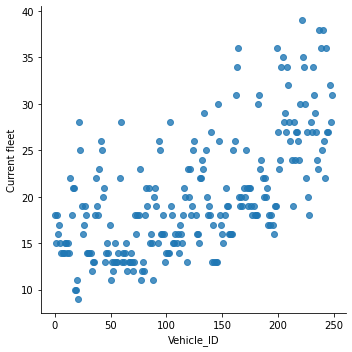

In [25]:
#Scatter plot for Current fleet column
sns.lmplot(df.columns[2], df.columns[0],
data=df, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


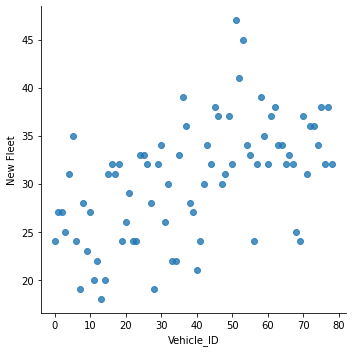

In [26]:
#Scatter plot for New Fleet Column
sns.lmplot(df.columns[2], df.columns[1],
data=df, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

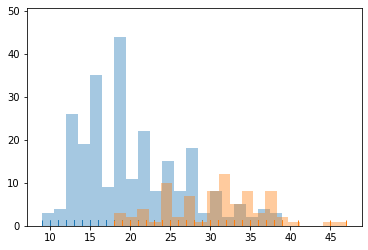

In [29]:
sns.distplot(current_data, bins=20, kde=False, rug=True)
sns.distplot(new_data, bins=20, kde=False, rug=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


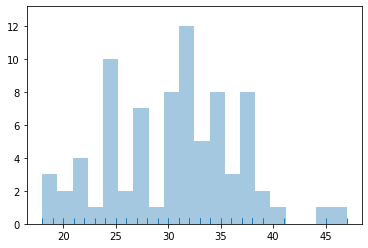

In [30]:
sns.distplot(new_data, bins=20, kde=False, rug=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


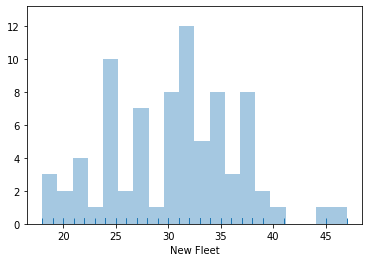

In [31]:
sns.distplot(new_fleet, bins=20, kde=False, rug=True)


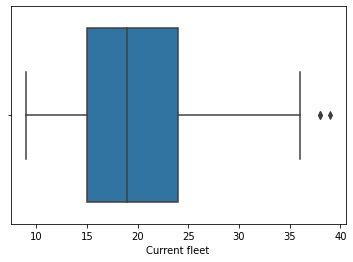

In [32]:
sns.boxplot(x='Current fleet', data=df)


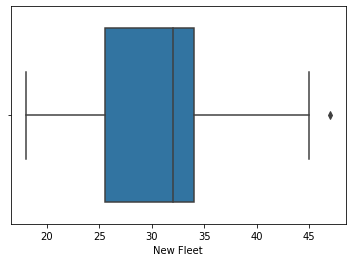

In [33]:
sns.boxplot(x='New Fleet', data=df)

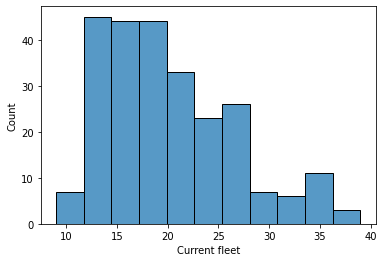

In [34]:
sns.histplot(data=df, x="Current fleet")

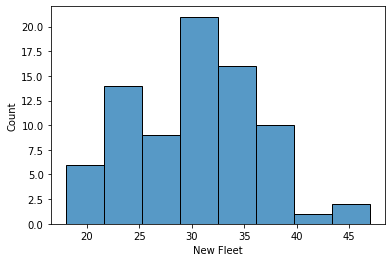

In [35]:
sns.histplot(data=df, x="New Fleet")
#This shows a normal distribution

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [36]:
#1. Calculating mean of both samples
currentfleet_mean = np.mean(df['Current fleet'])
newfleet_mean = np.mean(new_fleet)
print(currentfleet_mean)
print(newfleet_mean)

20.14457831325301
30.481012658227847


In [40]:
tobs = newfleet_mean - currentfleet_mean 
tobs
#Conclusion: #The new fleet is better since the mean of the new fleet is higher than the current

10.336434344974837

In [39]:
#merging the data into a new array
concat = np.concatenate((current_data, new_fleet))
concat

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15., 15., 14., 15.,
       14., 22., 18., 21., 21., 10., 10., 11.,  9., 28., 25., 19., 16.,
       17., 19., 18., 14., 14., 14., 14., 12., 13., 13., 18., 22., 19.,
       18., 23., 26., 25., 20., 21., 13., 14., 15., 14., 17., 11., 13.,
       12., 13., 15., 13., 13., 14., 22., 28., 13., 14., 13., 14., 15.,
       12., 13., 13., 14., 13., 12., 13., 18., 16., 18., 18., 23., 11.,
       12., 13., 12., 18., 21., 19., 21., 15., 16., 15., 11., 20., 21.,
       19., 15., 26., 25., 16., 16., 18., 16., 13., 14., 14., 14., 28.,
       19., 18., 15., 15., 16., 15., 16., 14., 17., 16., 15., 18., 21.,
       20., 13., 23., 20., 23., 18., 19., 25., 26., 18., 16., 16., 15.,
       22., 22., 24., 23., 29., 25., 20., 18., 19., 18., 27., 13., 17.,
       13., 13., 13., 30., 26., 18., 17., 16., 15., 18., 21., 19., 19.,
       16., 16., 16., 16., 25., 26., 31., 34., 36., 20., 19., 20., 19.,
       21., 20., 25., 21., 19., 21., 21., 19., 18., 19., 18., 18

In [41]:
#Permutating Testing to rearrange elements
perm = np.random.permutation(concat)
perm

array([30., 18., 10., 15., 22., 12., 36., 18., 16., 13., 24., 26., 14.,
       23., 38., 25., 15., 38., 28., 16., 39., 30., 21., 21., 15., 32.,
       28., 24., 26., 23., 24., 33., 23., 38., 28., 32., 34., 22., 19.,
       10., 47., 29., 22., 18., 17., 14., 31., 15., 18., 14., 16., 23.,
       24., 18., 18., 29., 21., 20., 24., 31., 19., 15., 22., 34., 13.,
       18., 26.,  9., 15., 27., 18., 45., 20., 16., 19., 14., 14., 19.,
       16., 24., 18., 18., 25., 23., 19., 16., 25., 14., 25., 27., 19.,
       28., 28., 26., 37., 18., 21., 28., 32., 33., 23., 38., 24., 18.,
       21., 32., 32., 20., 36., 18., 21., 31., 13., 16., 32., 13., 15.,
       28., 31., 22., 22., 16., 22., 20., 13., 16., 29., 19., 13., 12.,
       30., 17., 20., 17., 34., 16., 27., 19., 13., 13., 18., 27., 16.,
       19., 34., 36., 25., 22., 21., 17., 14., 33., 20., 18., 26., 12.,
       14., 19., 15., 32., 20., 35., 25., 26., 13., 20., 19., 18., 17.,
       27., 17., 14., 15., 24., 39., 39., 34., 21., 18., 15., 31

In [42]:

print('Length of New fleet is ' + str(len(new_fleet)))
print('Length of Current fleet is ' + str(len(current_data)))
print('Length of permutated fleet is ' + str(len(perm)))


Length of New fleet is 79
Length of Current fleet is 249
Length of permutated fleet is 328


In [43]:
#Splitting the permutated array
pnew = perm[:80]
pcurrent = perm[80:]

print(len(pcurrent) + len(pnew))

328


In [44]:
pnew_mean = np.mean(pnew)
print("Pnew mean is : " + str(pnew_mean))
pcurrent_mean = np.mean(pcurrent)
print("Pcurrent mean is : " + str(pcurrent_mean))
tperm = pnew_mean - pcurrent_mean
print("tperm  is : " + str(tperm))

Pnew mean is : 22.6375
Pcurrent mean is : 22.633064516129032
tperm  is : 0.004435483870967261


In [47]:
tperm > tobs
print

10.336434344974837

C:\Users\ak21535\.conda\envs\ce888\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

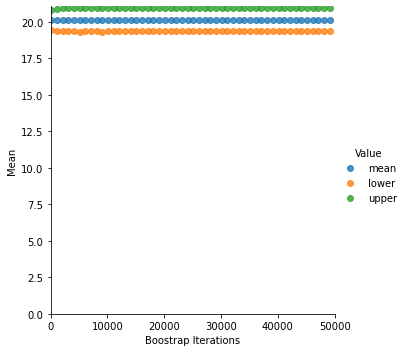

In [ ]:
#2.Using bootstrap function to construct the 95% CI of the mean of the current fleet
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(df['Current fleet'], df['Current fleet'].shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

C:\Users\ak21535\.conda\envs\ce888\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

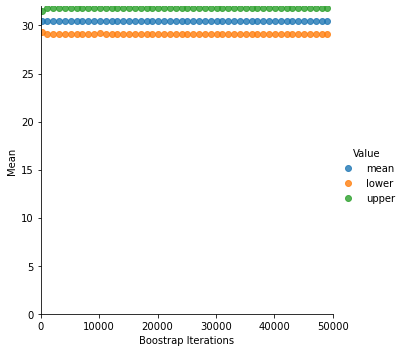

In [ ]:
#2.Using bootstrap function to construct the 95% CI of the mean of the new fleet
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(new_fleet, len(new_fleet), i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

In [ ]:
tobs = tob = newfleet_mean - currentfleet_mean
tobs
#The new fleet is better because it has a higher mean 

10.336434344974837

In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    tob = newfleet_mean - currentfleet_mean
    concat = np.concatenate((df['Current fleet'], newfleet))
    perm = np.random.permutation(concat)

    
    return pvalue